<a href="https://colab.research.google.com/github/Naecrae77/face-recognition-with-OpenCV/blob/main/Face_detection_and_processing_with_openCV__Sam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The task before us is to recognise a face on a picture, draw an oval round the recognised face and then add well fitted sunglasses (advisable to use a .png file).

Agter that, we will attempt to blur the detected face except the eyes (or in this case, the sunglasses)

In [2]:
!pip install opencv-python

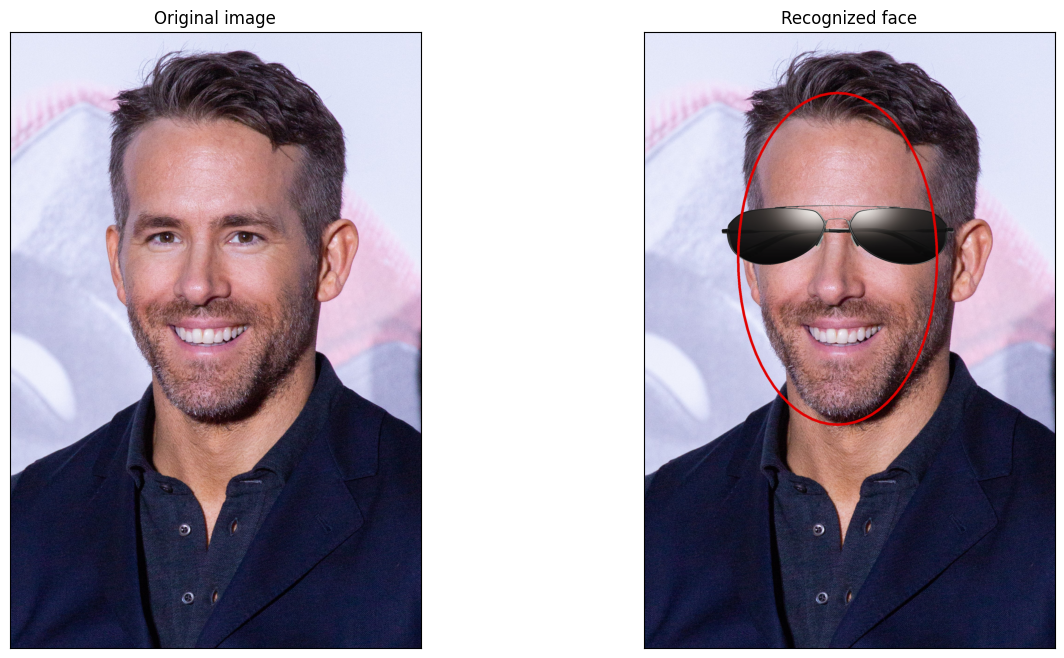

In [3]:
import cv2
from matplotlib import pyplot
from matplotlib import pyplot
%matplotlib inline

# Loading the image
img = cv2.imread('./Ryan_reynolds.jpg')
img2 = img.copy()
img3 = img2.copy()

# Load the sunglasses
sunglasses_mask = cv2.imread('./sunglasses.png', -1)
h_mask, w_mask = sunglasses_mask.shape[:2]


# Loading Haar cascade for facial recognition
classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_frontalface_default.xml")

# loading Haar cascade for eyes search
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades+ "haarcascade_eye.xml")

# performing face recognition
oval = classifier_face.detectMultiScale(img2, scaleFactor=1.1, minNeighbors=30, minSize=(30, 30))

# forming an oval around the detected face
# forming the coordinates
x,y,w,h = oval[0] # Working with image with only one face

center_x, center_y = int(x+w/2), int(y+h/2)

for (x, y, w, h) in oval:
    # Resize sunglasses to fit the detected face
    sunglasses_resized = cv2.resize(sunglasses_mask, (w, int(h * 0.3)))  # Adjust height as needed

    # Get dimensions of the resized sunglasses
    sw, sh = sunglasses_resized.shape[1], sunglasses_resized.shape[0]

    # Calculate position for sunglasses
    sunglasses_x = x + int(w / 2) - int(sw / 2)
    sunglasses_y = y + int(h / 4)  # Adjust Y position as needed

    # Create a mask for sunglasses
    alpha_sunglasses = sunglasses_resized[:, :, 3] / 255
    alpha_ryan = 1.0 - alpha_sunglasses

    # Overlay the sunglasses on the actor's image
    for c in range(0, 3):
        img2[sunglasses_y:sunglasses_y + sh, sunglasses_x:sunglasses_x + sw, c] = (
            alpha_sunglasses * sunglasses_resized[:, :, c] +
            alpha_ryan * img2[sunglasses_y:sunglasses_y + sh, sunglasses_x:sunglasses_x + sw, c]
        )

# drawing the oval
axes_length = int(w/2.5), int(h/1.5)
thickness = 10
angle = 0
start_angle = 0
end_angle = 360
colour = (0, 0, 225) # Red in BGR
cv2.ellipse(img2, (center_x, center_y), axes_length, angle, start_angle, end_angle, colour, thickness)


# Show the result

fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Original image')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Recognized face')


pyplot.show()


Now we'll create a `blur_face` function to blur the entire face except the sunglasses on the eyes

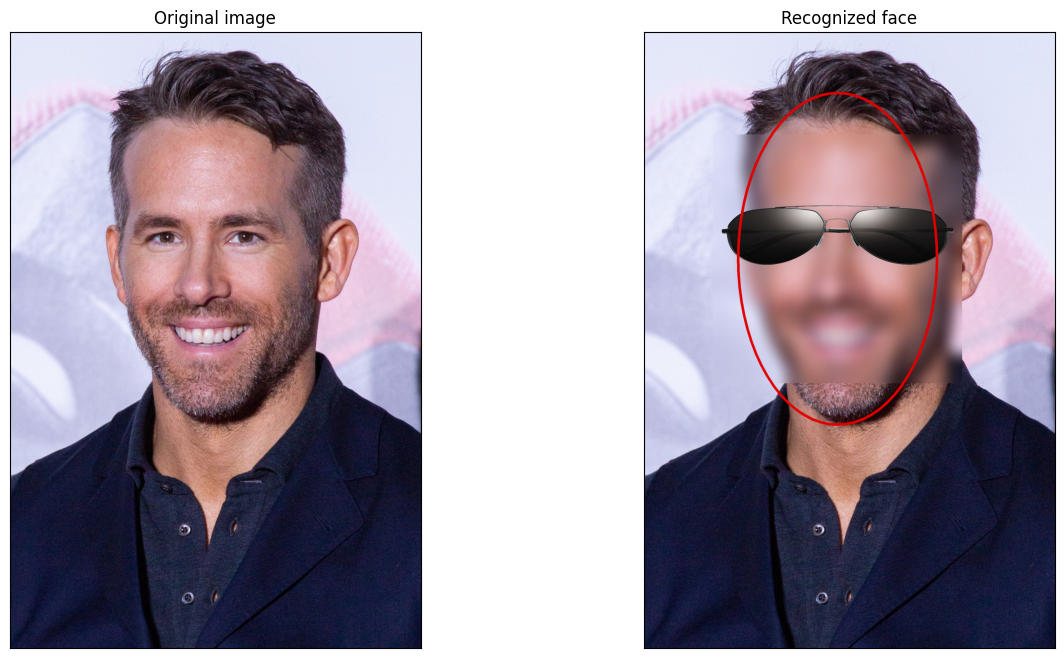

In [8]:
import cv2
# Loading the image
img = cv2.imread('./Ryan_reynolds.jpg')
img2 = img.copy()

# Load the sunglasses
sunglasses = cv2.imread('./sunglasses.png', -1)

def blur_face_except_sunglasses(original_image, sunglasses):
    image = original_image.copy()

    # Load Haar cascade for facial recognition
    classifier_face = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # Perform face recognition
    faces = classifier_face.detectMultiScale(img2, scaleFactor=1.1, minNeighbors=30, minSize=(30, 30))

    for (x, y, w, h) in faces:

        # Extract the face region
        face_region = image[y:y+h, x:x+w].copy()

        # Apply Gaussian blur to the face region
        blurred_face = cv2.GaussianBlur(face_region, (99, 99), 30)

        # Place the blurred face back into the image
        image[y:y+h, x:x+w] = blurred_face

        # Resize sunglasses to fit the detected face
        sunglasses_resized = cv2.resize(sunglasses, (w, int(h * 0.3)))

        # Get dimensions of the resized sunglasses
        sw, sh = sunglasses_resized.shape[1], sunglasses_resized.shape[0]

        # Calculate position for the sunglasses
        sunglasses_x = x + int(w / 2) - int(sw / 2)
        sunglasses_y = y + int(h / 4)

        # Create a mask for sunglasses
        alpha_sunglasses = sunglasses_resized[:, :, 3] / 255
        alpha_blurred_face = 1.0 - alpha_sunglasses

        # Overlay the sunglasses on the blurred face
        for c in range(0, 3):
            image[sunglasses_y:sunglasses_y + sh, sunglasses_x:sunglasses_x + sw, c] = (
                alpha_sunglasses * sunglasses_resized[:, :, c] +
                alpha_blurred_face * image[sunglasses_y:sunglasses_y + sh, sunglasses_x:sunglasses_x + sw, c]
            )

        # Drawing the oval around the face
        center_x, center_y = int(x + w / 2), int(y + h / 2)
        axes_length = int(w / 2.5), int(h / 1.5)
        thickness = 10
        colour = (0, 0, 225)  # Red in BGR
        cv2.ellipse(image, (center_x, center_y), axes_length, 0, 0, 360, colour, thickness)

    # Display the result
    fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
    ax1.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    ax1.xaxis.set_ticks([])
    ax1.yaxis.set_ticks([])
    ax1.set_title('Original image')

    ax2.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax2.xaxis.set_ticks([])
    ax2.yaxis.set_ticks([])
    ax2.set_title('Recognized face')

    pyplot.show()

# Usage
blur_face_except_sunglasses(img, sunglasses)